In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -100.000, high = 100.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record coutn.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | marsabit
Processing Record 3 of Set 1 | binga
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | ulaangom
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | apam
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | saint anthony
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | la rioja
Processing Record 18 of Set 1 | bongandanga
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | sao joao da barra
Processing Record 21 of Set 1 | attawapiskat
City not found. Skipping..

Processing Record 38 of Set 4 | san juan
Processing Record 39 of Set 4 | mkushi
Processing Record 40 of Set 4 | havelock
Processing Record 41 of Set 4 | hamilton
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | morondava
Processing Record 44 of Set 4 | diffa
Processing Record 45 of Set 4 | tucuma
Processing Record 46 of Set 4 | sisimiut
Processing Record 47 of Set 4 | gamba
Processing Record 48 of Set 4 | jawhar
Processing Record 49 of Set 4 | berlevag
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | zapolyarnyy
Processing Record 3 of Set 5 | albany
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | ali-yurt
Processing Record 6 of Set 5 | olafsvik
Processing Record 7 of Set 5 | saint-georges
Processing Record 8 of Set 5 | maykain
City not found. Skipping...
Processing Record 9 of Set 5 | lasa
Processing Record 10 of Set 5 | port blair
Processing Record 11 of Set 5 | tres arro

Processing Record 25 of Set 8 | luba
Processing Record 26 of Set 8 | rocha
Processing Record 27 of Set 8 | northport
Processing Record 28 of Set 8 | roald
Processing Record 29 of Set 8 | awjilah
Processing Record 30 of Set 8 | temiscaming
Processing Record 31 of Set 8 | baykit
Processing Record 32 of Set 8 | marzuq
Processing Record 33 of Set 8 | santa fe
Processing Record 34 of Set 8 | long
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | warrensburg
Processing Record 37 of Set 8 | candolim
Processing Record 38 of Set 8 | sibolga
Processing Record 39 of Set 8 | garh maharaja
Processing Record 40 of Set 8 | amambai
Processing Record 41 of Set 8 | lima
Processing Record 42 of Set 8 | ziyamet
City not found. Skipping...
Processing Record 43 of Set 8 | el alto
Processing Record 44 of Set 8 | mitsamiouli
Processing Record 45 of Set 8 | gorkovskoye
City not found. Skipping...
Processing Record 46 of Set 8 | chandler
Processing Record 47 of Set 8 | yenagoa
Processing Reco

Processing Record 16 of Set 12 | itacoatiara
Processing Record 17 of Set 12 | mangrol
Processing Record 18 of Set 12 | buta
Processing Record 19 of Set 12 | surat thani
Processing Record 20 of Set 12 | kilindoni
Processing Record 21 of Set 12 | grand-santi
Processing Record 22 of Set 12 | abiy adi
City not found. Skipping...
Processing Record 23 of Set 12 | liverpool
Processing Record 24 of Set 12 | matagami
Processing Record 25 of Set 12 | anloga
Processing Record 26 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 27 of Set 12 | pinotepa nacional
Processing Record 28 of Set 12 | brake
Processing Record 29 of Set 12 | veldhoven
Processing Record 30 of Set 12 | imbituba
Processing Record 31 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 32 of Set 12 | catemaco
Processing Record 33 of Set 12 | vallenar
Processing Record 34 of Set 12 | calama
Processing Record 35 of Set 12 | eyrarbakki
-----------------------------
Data Retrieval Complete      
---

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namibe,-15.1961,12.1522,67.05,79,100,3.18,AO,2021-11-21 00:59:31
1,Marsabit,2.3284,37.9899,65.28,83,9,15.03,KE,2021-11-21 00:59:31
2,Binga,-17.6203,27.3414,74.25,73,100,2.10,ZW,2021-11-21 00:59:31
3,Souillac,-20.5167,57.5167,76.35,88,75,5.75,MU,2021-11-21 00:59:32
4,Port Alfred,-33.5906,26.8910,64.00,84,98,18.81,ZA,2021-11-21 00:59:32
5,Ulaangom,49.9811,92.0667,5.86,64,16,4.88,MN,2021-11-21 00:59:32
6,Apam,5.2848,-0.7371,79.93,86,12,5.66,GH,2021-11-21 00:59:33
7,Dikson,73.5069,80.5464,-8.95,80,58,16.26,RU,2021-11-21 00:59:33
8,Saint-Philippe,-21.3585,55.7679,74.75,75,11,8.66,RE,2021-11-21 00:59:33
9,Mahebourg,-20.4081,57.7000,76.24,88,75,5.75,MU,2021-11-21 00:59:33


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_data_df[new_column_order]
city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Namibe,AO,2021-11-21 00:59:31,-15.1961,12.1522,67.05,79,100,3.18
1,Marsabit,KE,2021-11-21 00:59:31,2.3284,37.9899,65.28,83,9,15.03
2,Binga,ZW,2021-11-21 00:59:31,-17.6203,27.3414,74.25,73,100,2.10
3,Souillac,MU,2021-11-21 00:59:32,-20.5167,57.5167,76.35,88,75,5.75
4,Port Alfred,ZA,2021-11-21 00:59:32,-33.5906,26.8910,64.00,84,98,18.81
5,Ulaangom,MN,2021-11-21 00:59:32,49.9811,92.0667,5.86,64,16,4.88
6,Apam,GH,2021-11-21 00:59:33,5.2848,-0.7371,79.93,86,12,5.66
7,Dikson,RU,2021-11-21 00:59:33,73.5069,80.5464,-8.95,80,58,16.26
8,Saint-Philippe,RE,2021-11-21 00:59:33,-21.3585,55.7679,74.75,75,11,8.66
9,Mahebourg,MU,2021-11-21 00:59:33,-20.4081,57.7000,76.24,88,75,5.75


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data_ into a CSV.
city_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

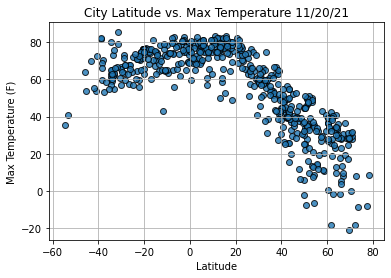

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_Data/Fig1.png")

# Show plot.
plt.show()

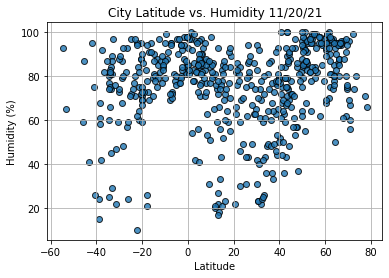

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

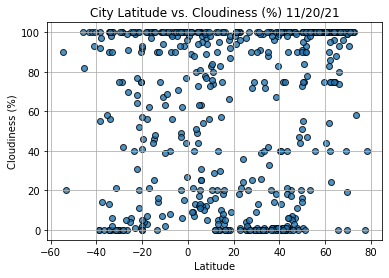

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

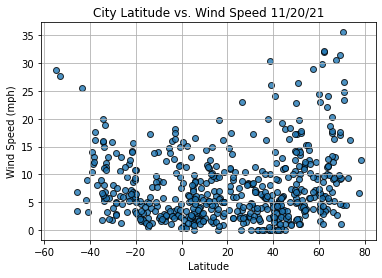

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()